📊 Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   c

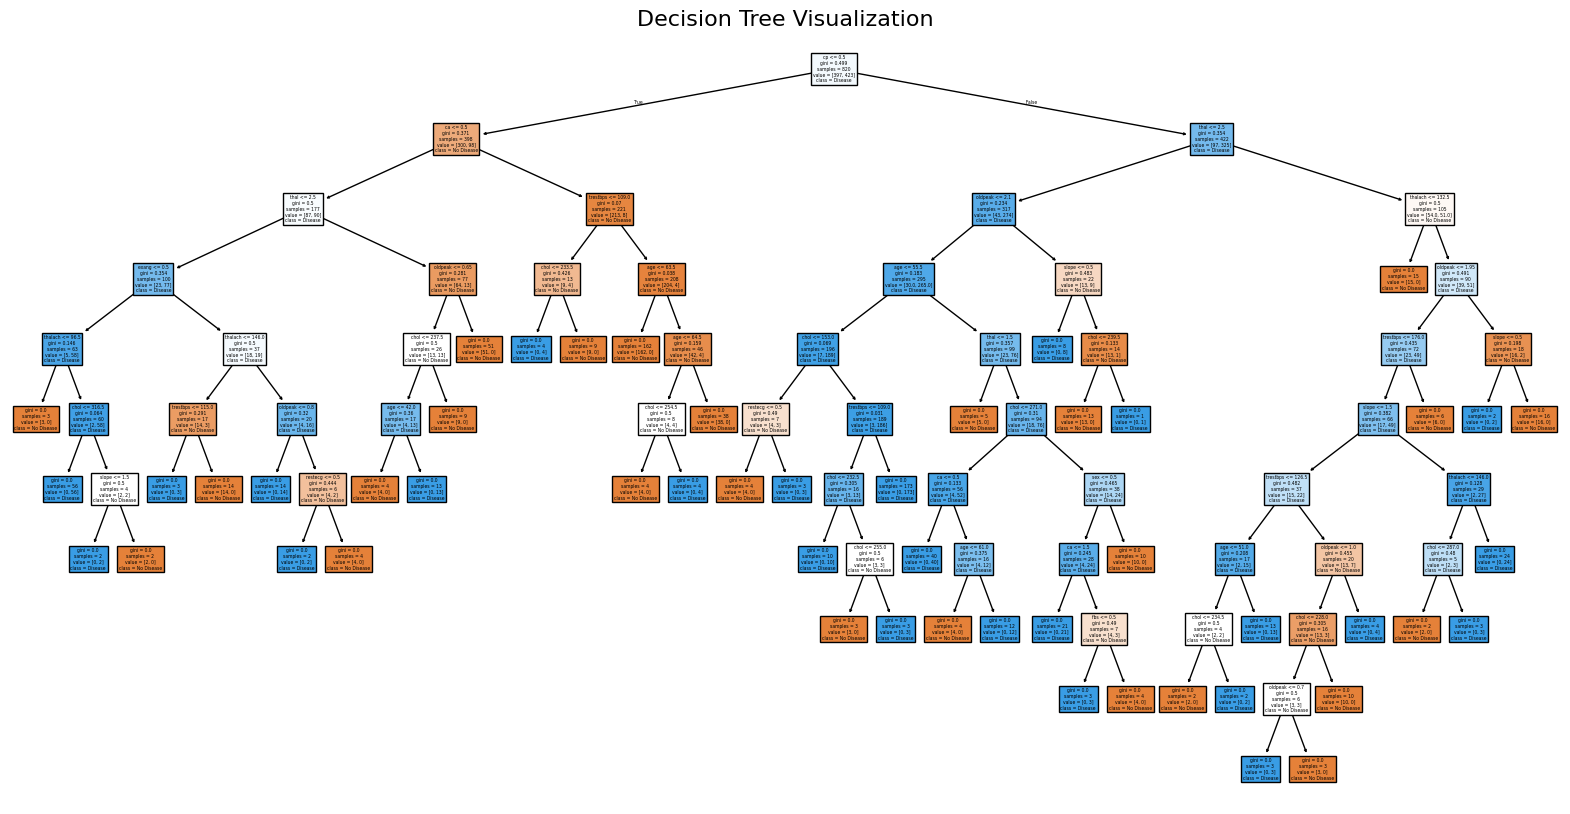


✂️ Pruned Decision Tree Accuracy: 0.8

🌲 Random Forest Accuracy: 0.9853658536585366

===================== MODEL COMPARISON =====================
Decision Tree Accuracy: 0.8
Random Forest Accuracy: 0.985


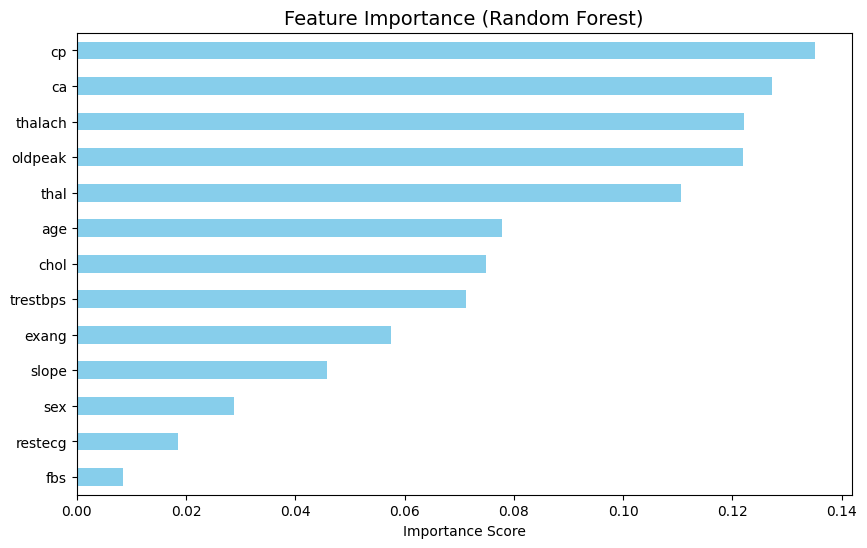


Cross-Validation Accuracy: 0.997

 Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



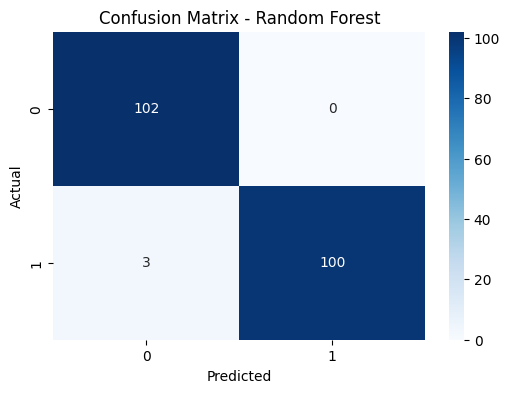

In [1]:
# ==============================================================
# Task 5: Decision Trees and Random Forests
# Objective: Learn tree-based models for classification & regression
# Tools: Scikit-learn, Graphviz, Matplotlib, Seaborn
# ==============================================================

# mport Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("heart.csv")

# Basic Info
print("📊 Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Split Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Split Data into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("\n🌳 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# Control Overfitting (Pruned Tree)
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("\n✂️ Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

#  Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("\n🌲 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

#  Compare Results
print("\n===================== MODEL COMPARISON =====================")
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_pruned), 3))
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("============================================================")

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.show()

# Cross-Validation
scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-Validation Accuracy:", round(np.mean(scores), 3))

# Classification Report and Confusion Matrix
print("\n Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
